<a href="https://colab.research.google.com/github/JankoBascarevic/Masinsko-Ucenje/blob/main/Domaci2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Neophodne biblioteke

In [1]:
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt

##Ucitavanje skupa podataka

In [2]:
data = pd.read_csv("Real estate.csv")
data.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


<Axes: >

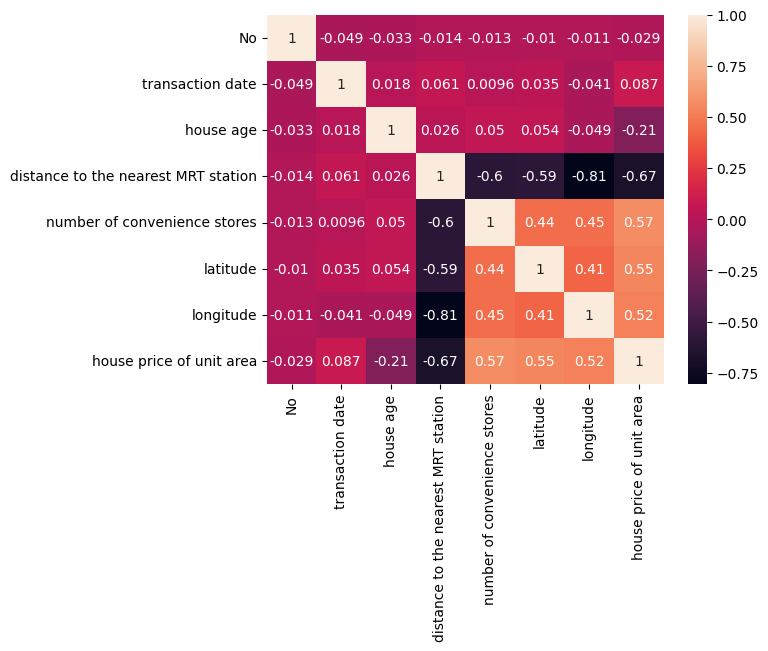

In [6]:
import seaborn as sns
cor = data.corr()
sns.heatmap(cor, annot=True)

##Biranje nezavisne promenljive

In [7]:
X = data['longitude'].values
Y = data['house price of unit area'].values

#racunanje srednjih vrednosti potrebne za nalazenje k i n
mean_x = np.mean(X)
mean_y = np.mean(Y)

##Racunanje k i n

In [8]:
sum1 = 0
sum2 = 0

#414 jer ima 414 redova u tabeli
for i in range(414):
  sum1 += (X[i] - mean_x) * (Y[i] - mean_y)
  sum2 += (X[i] - mean_x) ** 2
k = sum1 / sum2
n = mean_y - (k * mean_x)

print (f'k = {k} \nn = {n}')

k = 463.9347441251713 
n = -56345.56858531252


##Crtanje grafika

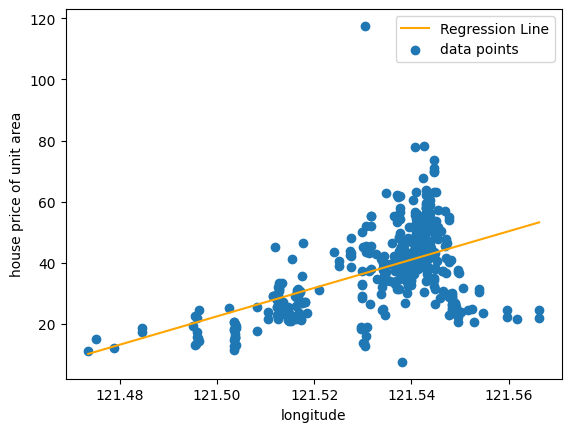

In [9]:
max_x = np.max(X)
min_x = np.min(X)


x = np.linspace (min_x, max_x)
y = k*x+n

plt.plot(x, y, color='orange', label='Regression Line')
plt.scatter(X, Y, label='data points')

plt.xlabel('longitude')
plt.ylabel('house price of unit area')
plt.legend()
plt.show()


##Trening test split

In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

print(len(train))
print(len(test))

331
83


##Definicija rmse i mae

In [11]:
import math
def rmse(y_true, y_pred):
  sum = 0
  for yt, yp in zip(y_true, y_pred):
    sum += (yt - yp) ** 2
  return math.sqrt(sum / len(y_true))

def mae(y_true, y_pred):
  sum = 0
  for yt, yp in zip(y_true, y_pred):
    sum += abs(yt - yp)
  return sum / len(y_true)

Racunanje rmse i mae

In [15]:
model = lambda x, n, k: n + k * x
y_pred = model(test['longitude'], n, k)
y_true = test['house price of unit area']

print(rmse(y_true, y_pred))
print(mae(y_true, y_pred))

10.763678127471405
7.924501391680221


Ovo je ispravljen domaci, sa dodatim trening test splitom i pravilnim racunanjem rmse i mae, nisam promenio nezavisnu promenljivu, ali je jasno zasto sam pogresio u odabiru, jer se jasno vidi da najvecu korelaciju ima distanca do MRT stanice.